<a href="https://colab.research.google.com/github/ffrnz/kaggle_house_price/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
data_description.gdoc  sample_submission.gsheet  test.gsheet  train.gsheet


In [50]:
url = 'https://raw.githubusercontent.com/ffrnz/kaggle_house_price/main/train.csv'
df_train = pd.read_csv(url)
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

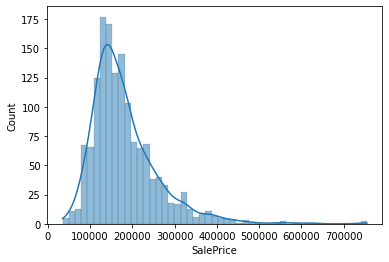

In [ ]:
sns.histplot(df_train['SalePrice'], kde = True, linewidth=.1)
df_train['SalePrice'].describe()

In [ ]:
print("skewness: %f" % df_train['SalePrice'].skew())
print("kurtosis: %f" % df_train['SalePrice'].kurt())

skewness: 1.882876
kurtosis: 6.536282


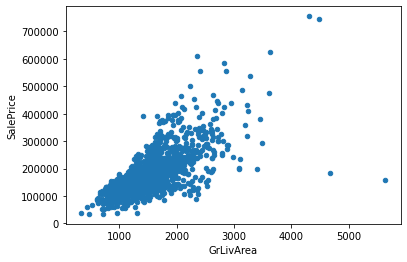

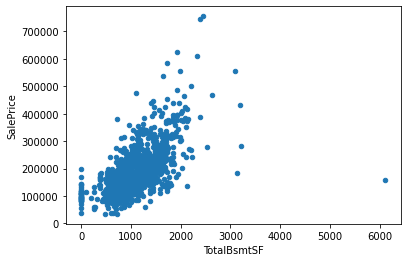

In [ ]:
for var in ['GrLivArea','TotalBsmtSF']:
  data=pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
  data.plot.scatter(x=var, y='SalePrice')

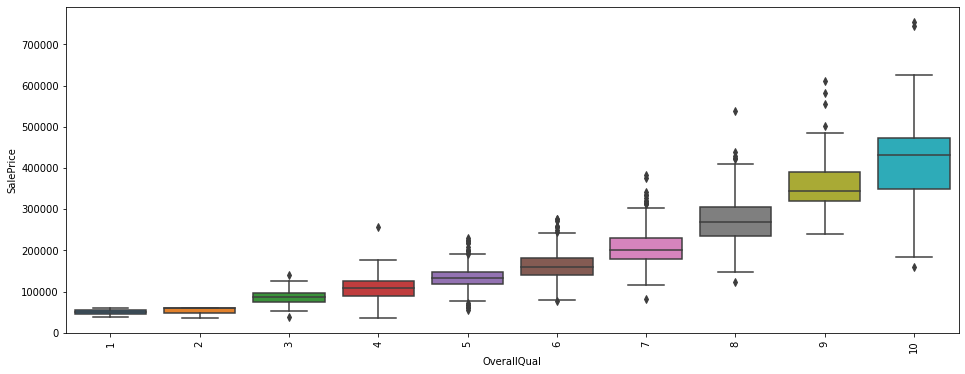

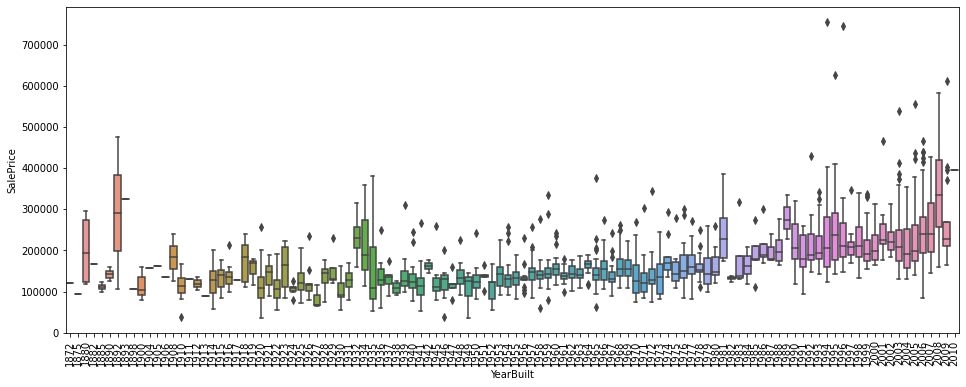

In [60]:
for var in ['OverallQual', 'YearBuilt']:
  data = df_train.loc[:,['SalePrice', var]]
  f,ax = plt.subplots(figsize=(16,6))
  sns.boxplot(x=var, y='SalePrice', data=data)
  plt.xticks(rotation = 90)

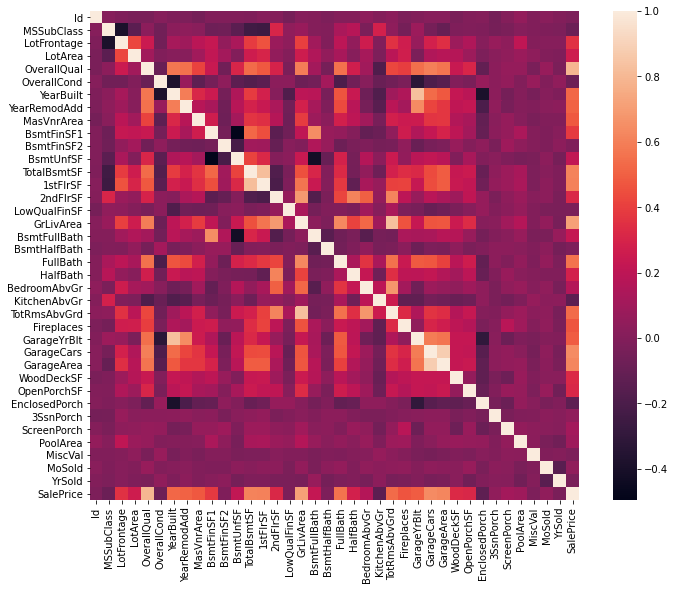

In [65]:
corrmap = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmap, square = True)

In [ ]:
#zoomed in version 
k = 10 
cols = corrmap.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show

In [ ]:
df_train[cols].values